# **Importing necessary libraries**

In [155]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

import random
import joblib

# **Collecting & loading the data**

In [156]:
df = pd.read_csv('/content/sample_data/winequality-red.csv')

In [157]:
# Showing the first 5 rows of the dataframe

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [158]:
# Showing the last 5 rows of the dataframe

df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [159]:
# Displaying the shape of the dataframe

df.shape

(1599, 12)

In [160]:
# Showing the size of the dataframe

df.size

19188

In [161]:
# Checking the datatypes

df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [162]:
# Checking for any missing values

df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [163]:
# Checking the count of the target

df['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [164]:
# Handling the unwanted spaces in the column names for better readability

df.columns = df.columns.str.strip()

In [165]:
# Description of the data

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# **Data Visualization**

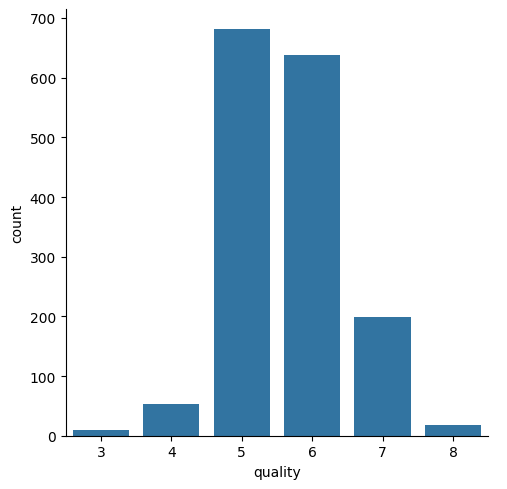

In [166]:
# Plotting the count of target variables

sns.catplot(x='quality', data=df, kind='count')

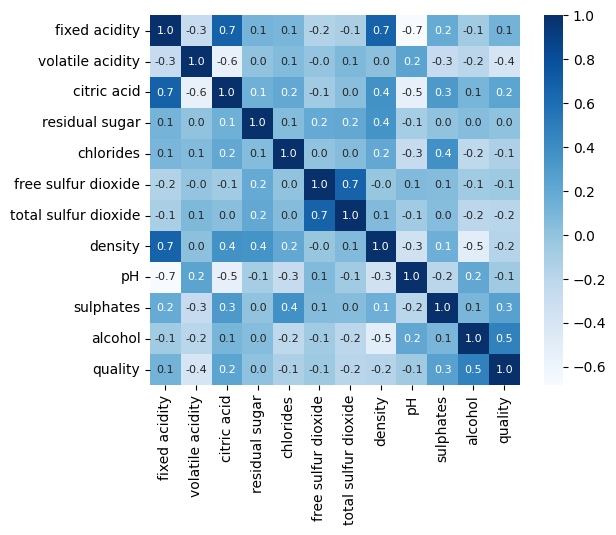

In [167]:
# Plotting a correlation matrix

corr = df.corr()

sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size' : 8}, cmap='Blues')

plt.show()

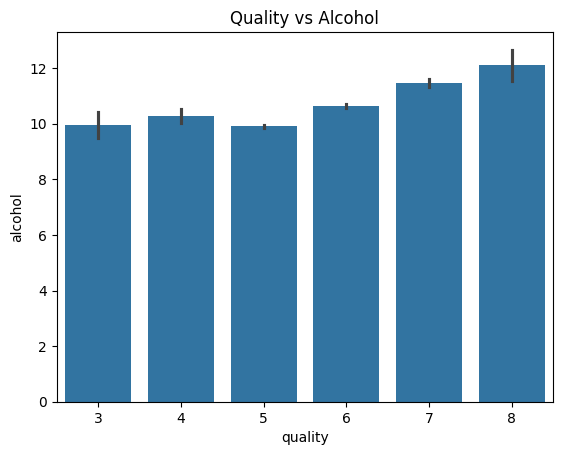

In [168]:
# Quality vs Alcohol

plot = plt.figsize=(5,5)
sns.barplot(x='quality', y='alcohol', data=df)

plt.title("Quality vs Alcohol")

plt.show()

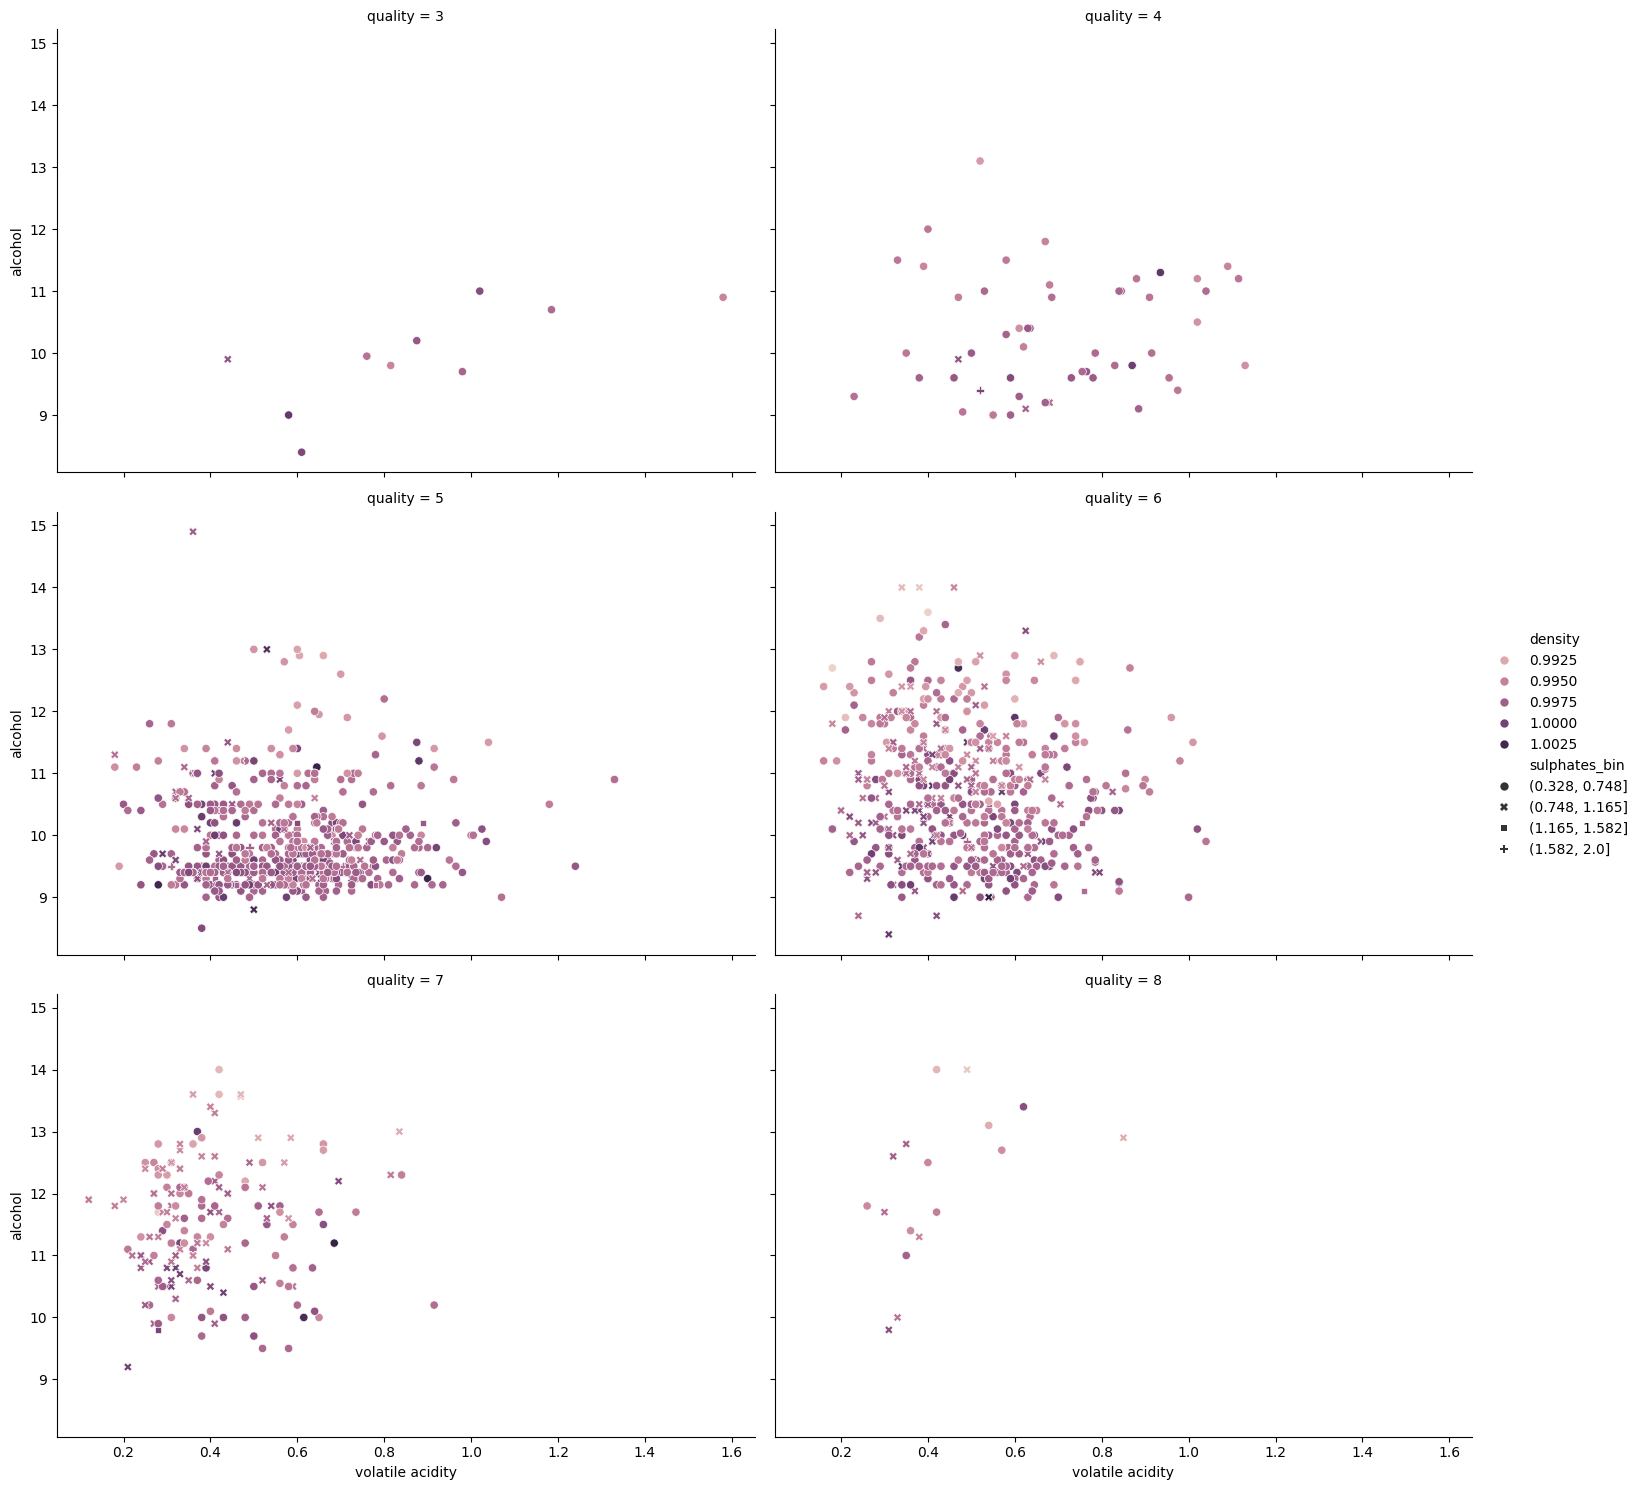

In [169]:
# Relationalplot of selected features against target

df['sulphates_bin'] = pd.cut(df['sulphates'], bins=4)

sns.relplot(data=df, x='volatile acidity', y='alcohol', col='quality', hue='density', style='sulphates_bin',col_wrap=2,height=5, aspect=1.5)

plt.show()

# **Data pre-processing**

In [185]:
# Splitting the data into X(labels) & Y(target) #

X = df.drop(columns=['sulphates_bin', 'quality'], axis=1)
Y = df['quality']

X.shape

(1599, 11)

In [171]:
# Label binarization on target

Y = df['quality'].apply(lambda value: 1 if value >= 6 else 0)

Y.value_counts()

,count
quality,
1,855
0,744


In [172]:
# Applying SMOTE to handle imbalance target column

sm = SMOTE(random_state=42)

X_smote, Y_smote = sm.fit_resample(X, Y)

X = X_smote
Y = Y_smote

In [173]:
# Splitting the data into train and test data, required before training the model

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

# **Training the model**

In [174]:
# Intializing the instances of the model - RandomForest and AdaBoost

random_model = RandomForestClassifier()

base_est = DecisionTreeClassifier()
ada_boost = AdaBoostClassifier(estimator=base_est, random_state=42)

In [175]:
# Training the randomforest model with training data

random_model.fit(X_train, Y_train)

# Training the adaboost model with training data

ada_boost.fit(X_train, Y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [176]:
# Testing the models with test data

# Random Forest
y_pred_rf = random_model.predict(X_test)

# Ada Boost

y_pred_adb = ada_boost.predict(X_test)


In [190]:
# Defining a function to get accuracy of different models

def evaluate_model(y_true, y_pred, model_name="Model"):

    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    message = (
        f"The accuracy score of {model_name} is: {accuracy * 100:.2f}%\n\n"
        f"Classification Report for {model_name}:\n\n{report}"
        )

    return message


In [192]:
# Displaying the accuracy score of both the models

evaluate_random_forest = evaluate_model(Y_test, y_pred_rf, "Random Forest")

print(evaluate_random_forest)

The accuracy score of Random Forest is: 81.29%

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       156
           1       0.85      0.80      0.82       186

    accuracy                           0.81       342
   macro avg       0.81      0.81      0.81       342
weighted avg       0.81      0.81      0.81       342



In [194]:
# AdaBoost

evaluate_adaboost_model = evaluate_model(Y_test, y_pred_adb, "Ada Boost")

print(evaluate_adaboost_model)

The accuracy score of Ada Boost is: 75.73%

Classification Report for Ada Boost:

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       156
           1       0.78      0.78      0.78       186

    accuracy                           0.76       342
   macro avg       0.76      0.76      0.76       342
weighted avg       0.76      0.76      0.76       342



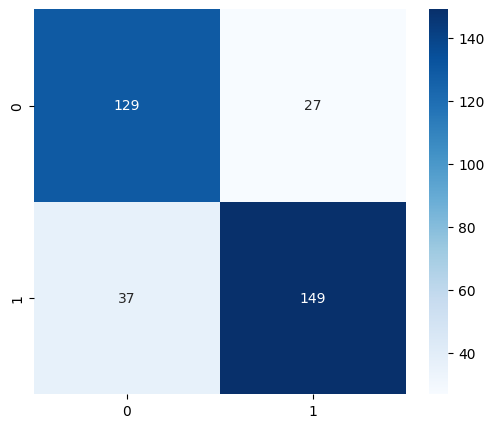

In [180]:
# Displaying the confusion matrix of Random Forest

cm_rf = confusion_matrix(Y_test, y_pred_rf)

plt.figure(figsize=(6,5))

sns.heatmap(cm_rf, fmt='d', cmap='Blues', annot=True)

plt.show()

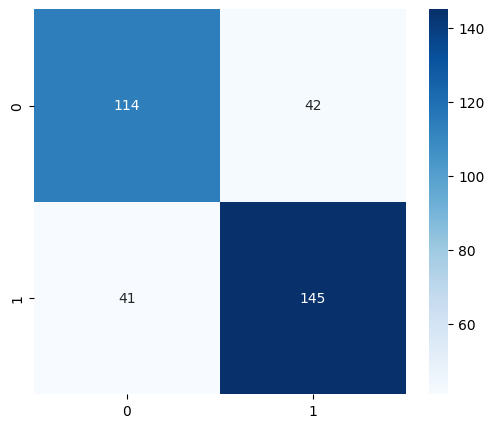

In [181]:
# Displaying the confusion matrix of AdaBoost

cm_ad = confusion_matrix(Y_test, y_pred_adb)

plt.figure(figsize=(6,5))

sns.heatmap(cm_ad, fmt='d', cmap='Blues', annot=True)

plt.show()

# **Hyperparamter Tuning**

In [189]:
def Hyper_paramter(model, param_grid, x_train, y_train):
  random = RandomizedSearchCV(
      estimator=model,
      param_distributions=param_grid,
      n_iter=50,                    # Number of random combinations to try
      scoring='accuracy',          # or 'f1', 'roc_auc', etc.
      cv=5,                         # 5-fold cross-validation
      verbose=1,
      random_state=42,
      n_jobs=-1
      )

  tuned_model = random.fit(x_train, y_train)

  return tuned_model.best_estimator_

In [197]:
# Tuning both the models

# Random Forest

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']  # for classifier only
}

random_forest_tuned = Hyper_paramter(random_model, param_grid, X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [200]:
# Fitting the tuned random forest model with test data

random_forest_tuned.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, max_features='log2',
                       min_samples_leaf=2, min_samples_split=5)

In [201]:
# Making prediction with the tuned model

y_pred_rf_tuned = random_forest_tuned.predict(X_test)

In [204]:
# Checking the accuracy of the same after tuning

evaluation_tuned_rf = evaluate_model(Y_test, y_pred_rf_tuned, 'Random Forest after tuned')

print(evaluation_tuned_rf)

The accuracy score of Random Forest after tuned is: 79.53%

Classification Report for Random Forest after tuned:

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       156
           1       0.83      0.78      0.81       186

    accuracy                           0.80       342
   macro avg       0.79      0.80      0.79       342
weighted avg       0.80      0.80      0.80       342



In [208]:
# Tuning the ada boost

param_grid_ada = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'estimator': [DecisionTreeClassifier(max_depth=1),
                       DecisionTreeClassifier(max_depth=2)]
}


ada_boost_tuned = Hyper_paramter(ada_boost, param_grid_ada, X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [209]:
# Fitting the tuned ada boost model with test data

ada_boost_tuned.fit(X_train, Y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=100, random_state=42)

In [210]:
# Making prediction with the tuned model

y_pred_adb_tuned = ada_boost_tuned.predict(X_test)

In [211]:
# Checking the accuracy of the model after tuning

evaluation_tuned_adb = evaluate_model(Y_test, y_pred_adb_tuned, 'AdaBoost after tuned')

print(evaluation_tuned_adb)

The accuracy score of AdaBoost after tuned is: 76.90%

Classification Report for AdaBoost after tuned:

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       156
           1       0.80      0.77      0.78       186

    accuracy                           0.77       342
   macro avg       0.77      0.77      0.77       342
weighted avg       0.77      0.77      0.77       342



# **Conclusion**

In [182]:
# From the above traing, tuning and evaluation of models, it is apparent that Randomforest model is outperforming Adaboost
# Even though it didnt show any significant difference after tuning, decided to move with randomforest to test with random forest

In [215]:
# Testing model with some random data

fixed_acidity = 7.4
volatile_acidity =  0.7
citric_acid =  0
residual_sugar = 1.9
chlorides = 0.076
free_sulfur_dioxide =  11
total_sulfur_dioxide =  34
density = 0.9978
pH = 3.51
sulphates = 0.56
alcohol =  9.4

test_input_data = [[fixed_acidity,
                    volatile_acidity,
                    citric_acid,
                    residual_sugar,
                    chlorides,
                    free_sulfur_dioxide,
                    total_sulfur_dioxide,
                    density,
                    pH,
                    sulphates,
                    alcohol]]



model_prediction = random_model.predict(test_input_data) # Supposed to get Low Quality

if model_prediction == 0:
  print("Low Quality")
else:
  print("High Quality")

# Conclusion: Accurately predicting

Low Quality


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# **Extracting the trained model using Joblib & testing with different set of data**

In [216]:
# Extracting the model

joblib.dump(random_model, 'trained_random_forest_model.sav')

['trained_random_forest_model.sav']

In [217]:
# Testing with random data after importing the model

model = joblib.load('/content/trained_random_forest_model.sav')

fixed_acidity = 7.3
volatile_acidity =  0.65
citric_acid =  0
residual_sugar = 1.2
chlorides = 0.065
free_sulfur_dioxide =  15
total_sulfur_dioxide =  21
density = 0.9946
pH = 3.39
sulphates = 0.47
alcohol =  10

input_data = [[fixed_acidity,
                    volatile_acidity,
                    citric_acid,
                    residual_sugar,
                    chlorides,
                    free_sulfur_dioxide,
                    total_sulfur_dioxide,
                    density,
                    pH,
                    sulphates,
                    alcohol]]

prediction = model.predict(input_data) # Supposed to get High Quality

if prediction == 1:
  print("High Quality wine !!")
else:
  print("Low Quality wine !!")

High Quality wine !!


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
